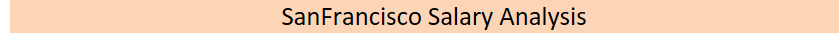




One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

Information about data provided

The provided dataset consists of below list of columns

1. Id
2. EmployeeName
3. JobTitle
4. BasePay
5. OvertimePay
6. OtherPay
7. Benefits
8. TotalPay
9. TotalPayBenefits
10. Year
11. Notes
12. Agency
13. Status

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Read the file Salaries.csv as a dataframe named "sal"

In [2]:
sal = pd.read_csv("../input/sf-salaries/Salaries.csv", low_memory= False)

Checking the number of rows and columns

In [3]:
sal.shape

Check the head and tail of the DataFrame

In [4]:
sal.head(10)

In [5]:
sal.tail(10)

Checking the datatypes

In [6]:
sal.dtypes

Check how much missing data we have in our dataset

In [8]:
sns.heatmap(sal.isnull(),yticklabels=False,cbar= False,cmap='cividis')

Dropping "Id","Notes" & "Agency" columns

In [9]:
sal.drop(["Id", "Notes", "Agency"], axis = 1, inplace = True)
sal.head()

Replacing the null values & "Not Provided" values in Basepay & Benefits with 0s

In [11]:
for column in ['BasePay', 'Benefits']:
    sal[column] = np.where((sal[column].isna()) | (sal[column] == "Not Provided"),0,sal[column])

Replacing the NaN values with new category "Missing Values"

In [12]:
sal["Status"] = sal["Status"].fillna("Missing Value")

In [13]:
sns.heatmap(sal.isnull(),yticklabels=False,cbar= False,cmap='cividis')

How many total missing values do we have in our dataset and percent of the data that is missing

In [14]:
missing_values_count = sal.isnull().sum(axis=0)
print(missing_values_count)

What is the highest amount of TotalPayBenefits in the dataset?

In [15]:
sal['TotalPayBenefits'].max()

What is the lowest amount of TotalPayBenefits in the dataset?

In [16]:
sal['TotalPayBenefits'].min()

What is the highest OvertimePay?

In [18]:
sal['OvertimePay'].max()

Total number of unique values in Job-Title column are?

In [17]:
sal['JobTitle'].nunique()

What is the name of the highest paid person (including benefits)?

In [18]:
sal.loc[sal['TotalPayBenefits'].idxmax()]

What are the top 5 most common jobs?

In [19]:
sal['JobTitle'].value_counts().head(5)

Visualizing the column with respect to Total Pay

In [20]:
sal.groupby("Year")["TotalPay"].mean().plot.bar()

In [21]:
sns.pairplot(sal)

In [22]:
TP = sal.sort_values(by='TotalPay', ascending=False)[:21]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=TP.JobTitle, x=TP.TotalPay,  palette="rocket")
plt.xticks()
plt.xlabel('TotalPay')
plt.ylabel('JobTitle')
plt.title('Countplot of TotalPay of first 20 Job Title')
plt.show()